In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Setup

In [27]:
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')
pd.options.display.float_format= "{:.2f}".format

In [4]:
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


# Preprocess

In [5]:
holiday_events = {
    'SuperBowl':['12-02-2010','11-02-2011','10-02-2012','08-02-2013'],
    'LabourDay':['10-09-2010','09-09-2011','07-09-2012','06-09-2013'],
    'Thanksgiving':['26-11-2010','25-11-2011','23-11-2012','29-11-2013'],
    'Christmas':['31-12-2010','30-12-2011','28-12-2012','27-12-2013']
    }

flatten_events = {val:key for key,lst in holiday_events.items() for val in lst}

In [6]:
df['Holiday_Event'] = df['Date'].map(flatten_events)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Temperature'] = (df['Temperature'] - 32 ) * (5/9)
df = df.sort_values(by='Date')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [7]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event,Month,Year
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,NaN,2,2010
1287,10,2010-02-05,2193048.75,0,12.41,2.96,126.44,9.77,NaN,2,2010
5148,37,2010-02-05,536006.73,0,7.76,2.57,209.85,8.55,NaN,2,2010
2288,17,2010-02-05,789036.02,0,-4.94,2.67,126.44,6.55,NaN,2,2010
4147,30,2010-02-05,465108.52,0,3.92,2.57,210.75,8.32,NaN,2,2010
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,13.72,3.88,216.15,7.29,NaN,10,2012
714,5,2012-10-26,319550.77,0,22.06,3.51,224.04,5.42,NaN,10,2012
5719,40,2012-10-26,921264.52,0,9.81,3.92,138.73,4.14,NaN,10,2012
2573,18,2012-10-26,1127516.25,0,13.38,3.92,138.73,8.24,NaN,10,2012


# Big Question No.1: How to improve sales of top lowest stores?

## Get total sales of each store

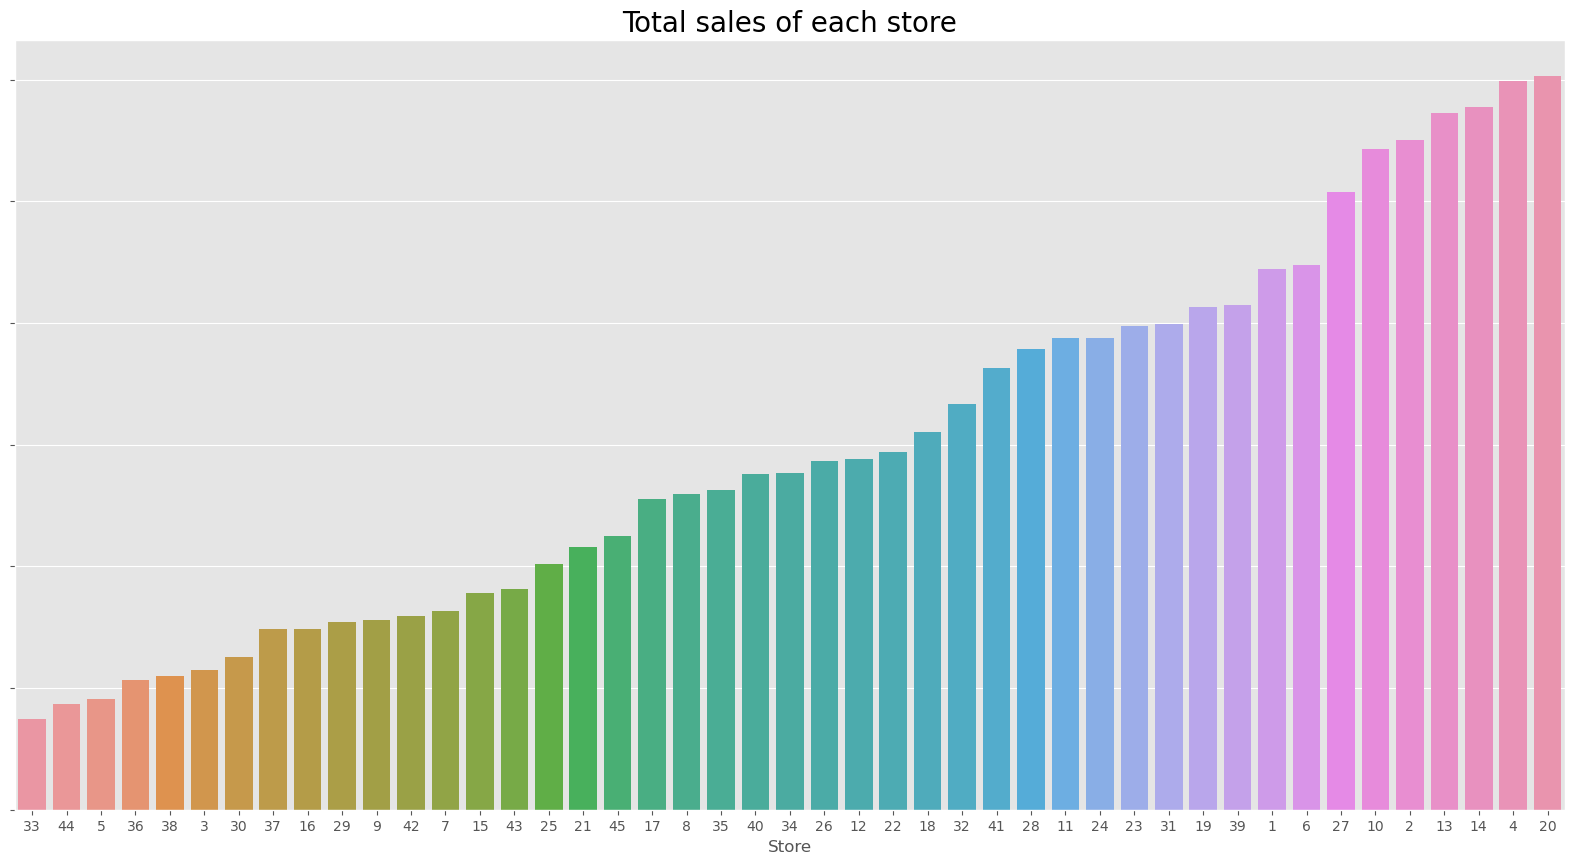

In [28]:
sales_by_store = df[['Store','Weekly_Sales']].groupby('Store').agg('sum').reset_index()
fig = sns.barplot(
    data=sales_by_store,x='Store',y='Weekly_Sales',
    order=sales_by_store.sort_values(by='Weekly_Sales')['Store']);

fig.set_title('Total sales of each store',fontsize=20);
fig.set_ylabel('')
fig.set_yticklabels([]);

## Top 3 lowest sales stores

Text(1.3, 0.3, '27.46%')

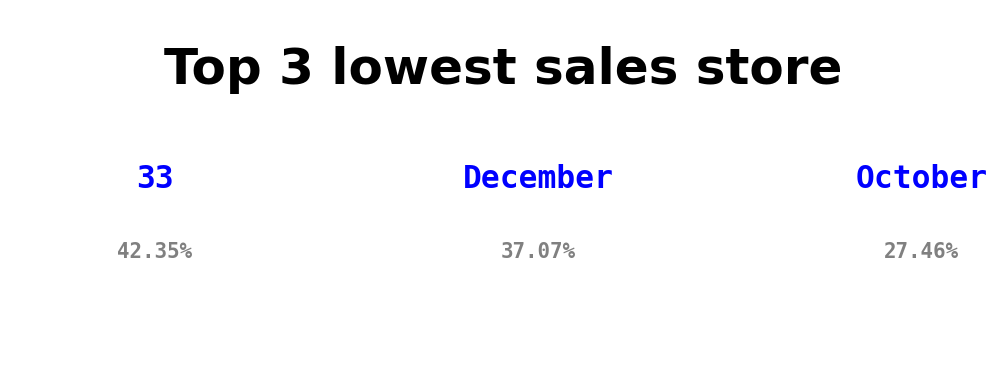

In [37]:
top3_lowest = sales_by_store.sort_values(by='Weekly_Sales').head(3)
fig, ax = plt.subplots(1, 1, figsize = (6, 3), dpi = 150)
ax.set(facecolor='white')
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.tick_params(axis='both',length=0)

ax.text(0.7, 0.8, "Top 3 lowest sales store" , color = 'black', fontsize = 24, fontweight = 'bold', 
         fontfamily = 'serif', ha = 'center')
ax.text(0.2, 0.5, top3_lowest.iloc[0,0], color = 'blue', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(0.2, 0.3, "42.35%", color = 'gray', fontsize = 10, fontfamily = 'monospace',ha = 'center', fontweight = 'bold')
ax.text(0.75, 0.5, "December", color = 'blue', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(0.75, 0.3, "37.07%", color = 'gray', fontsize = 10, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(1.3, 0.5, "October", color = 'blue', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(1.3, 0.3, "27.46%", color = 'gray', fontsize = 10, fontfamily = 'monospace', ha = 'center', fontweight = 'bold')